In [1]:
# import Library

import json
from pprint import pprint
import os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

In [388]:
# !pip install kagglehub

In [390]:
# import kagglehub
# path = kagglehub.dataset_download("joebeachcapital/30000-spotify-songs")

# print("Path to dataset files:", path)

In [4]:
# Download Spotify Dataset : https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs?resource=download
df = pd.read_csv(r'\spotify_songs.csv', encoding='utf-8')

In [5]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [10]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [11]:
# select some columns
Songs_df = df[['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'danceability', 'energy', 'valence', 'tempo', 'duration_ms']]

In [12]:
#Too many duplicates (7600 entries removed)
Songs_df[Songs_df.duplicated(keep=False)].sort_values(by='track_id')
Songs_df = Songs_df.drop_duplicates(keep='first')

In [13]:
# renameing columns
Songs_df.columns = ['Song_ID', 'Song_NAME', 'Song_ARTIST', 'Song_POPULARITY',
       'Album_ID', 'Album_NAME', 'Album_DATE',
       'Style_DANCE', 'Style_ENERGY', 'Song_VALENCE', 'Style_TEMPO', 'Song_PLAYTIME']

In [72]:
Songs_df

,Song_ID,Song_NAME,Song_ARTIST,Song_POPULARITY,Album_ID,Album_NAME,Album_DATE,Style_DANCE,Style_ENERGY,Song_VALENCE,Style_TEMPO,Song_PLAYTIME
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,0.748,0.916,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,0.726,0.815,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,0.675,0.931,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,0.718,0.930,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,0.650,0.833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,0.428,0.922,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,0.522,0.786,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,0.529,0.821,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,0.626,0.888,0.3080,128.008,367432


In [73]:
# Use Album release DATE to extract timing (year, quarter) features

# year
Songs_df['Album_DATE_YEAR'] = Songs_df['Album_DATE'].str[0:4]

# quarter
idx = Songs_df['Album_DATE'].str.len() == 4   # year-only column -> no quarter data
Songs_df.loc[idx, 'Album_DATE_QUARTER'] = 'No data'
Songs_df.loc[~idx, 'Album_DATE_QUARTER'] = ((Songs_df.loc[~idx, 'Album_DATE'].str[5:7].astype(int) - 1) // 3 + 1).astype(str)

In [74]:
# Song characteristics -> Songs suitable for dance, energetic songs, speed songs, etc
Songs_df['Song_STYLE'] = ''

idx_dance = Songs_df['Style_DANCE'] <= 0.7   #suitable for dance

idx_energy1 = Songs_df['Style_ENERGY'] <= 0.4   #Relaxed songs
idx_energy2 = Songs_df['Style_ENERGY'] >= 0.7   #energetic songs

idx_tempo1 = Songs_df['Style_TEMPO'] <= 90   #solw songs
idx_tempo2 = Songs_df['Style_TEMPO'] >= 140  #speed songs

In [75]:
Songs_df.loc[idx_dance, 'Song_STYLE'] += 'Danceable '

Songs_df.loc[idx_energy1, 'Song_STYLE'] += 'Relaxed '
Songs_df.loc[idx_energy2, 'Song_STYLE'] += 'Energetic '

Songs_df.loc[idx_tempo1, 'Song_STYLE'] += 'Slow-paced '
Songs_df.loc[idx_tempo2, 'Song_STYLE'] += 'Fast-paced '

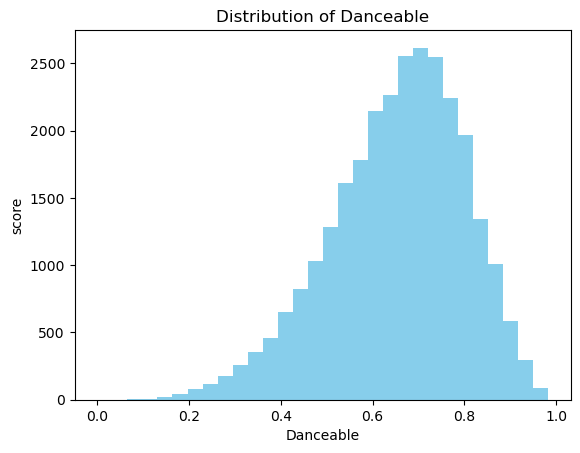

In [19]:
import matplotlib.pyplot as plt
plt.hist(Songs_df['Style_DANCE'].dropna(), bins=30, color='skyblue')

plt.title('Distribution of Danceable')
plt.xlabel('Danceable')
plt.ylabel('score')

plt.show()

In [76]:
# popluarity
Songs_df['POPULARITY_RANK'] = ''

idx1 = Songs_df['Song_POPULARITY'] < 30
idx2 = (Songs_df['Song_POPULARITY'] >= 30) & (Songs_df['Song_POPULARITY'] < 50)
idx3 = (Songs_df['Song_POPULARITY'] >= 50) & (Songs_df['Song_POPULARITY'] < 70)
idx4 = (Songs_df['Song_POPULARITY'] >= 70) & (Songs_df['Song_POPULARITY'] < 80)
idx5 = Songs_df['Song_POPULARITY'] >= 80


Songs_df.loc[idx1, 'POPULARITY_RANK'] = '★☆☆☆☆'
Songs_df.loc[idx2, 'POPULARITY_RANK'] = '★★☆☆☆'
Songs_df.loc[idx3, 'POPULARITY_RANK'] = '★★★☆☆'
Songs_df.loc[idx4, 'POPULARITY_RANK'] = '★★★★☆'
Songs_df.loc[idx5, 'POPULARITY_RANK'] = '★★★★★'

In [77]:
# song's mood -> bright Vs dark
idx = Songs_df['Song_VALENCE'] <= 0.5
Songs_df.loc[idx, 'Song_MOOD'] = "dark"
Songs_df.loc[~idx, 'Song_MOOD'] = "bright"

In [78]:
# playtime: Change unit from milliseconds(ms) to seconds(s)

Songs_df['Song_PLAYTIME'] = Songs_df['Song_PLAYTIME']//1000

In [79]:
import html
# Missing values filled with empty strings
# special characters removed
Songs_df["Song_NAME"] = Songs_df["Song_NAME"].fillna(" ").astype(str)
Songs_df["Song_NAME"] = Songs_df["Song_NAME"].apply(html.escape)

Songs_df["Album_NAME"] = Songs_df["Album_NAME"].fillna(" ").astype(str)
Songs_df["Album_NAME"] = Songs_df["Album_NAME"].apply(html.escape)

Songs_df["Song_ARTIST"] = Songs_df["Song_ARTIST"].fillna(" ").astype(str)
Songs_df["Song_ARTIST"] = Songs_df["Song_ARTIST"].apply(html.escape)

In [80]:
# Very small decimal values
# → displayed as non-numeric (scientific notation)
# → converted to 0

idx = Songs_df.Style_DANCE < 0.0001
Songs_df.loc[idx, 'Style_DANCE'] = 0
idx = Songs_df.Style_ENERGY < 0.0001
Songs_df.loc[idx, 'Style_ENERGY'] = 0
idx = Songs_df.Song_VALENCE < 0.0001
Songs_df.loc[idx, 'Song_VALENCE'] = 0
idx = Songs_df.Style_TEMPO < 0.0001
Songs_df.loc[idx, 'Style_TEMPO'] = 0

In [82]:
# Songs_df.head()

In [24]:
# Save file to json
Songs_df.to_json("spotify_songs.json", orient="records", force_ascii=False, indent=2)

In [26]:
# Load json file
with open(r'\spotify_songs.json', 'r', encoding='utf-8') as f:
    songs_json_df = json.load(f)

In [29]:
pprint(songs_json_df[:2])

[{'Album_DATE': '2019-06-14',
  'Album_ID': '2oCs0DGTsRO98Gh5ZSl2Cx',
  'Album_NAME': "I Don't Care (with Justin Bieber) [Loud Luxury Remix]",
  'Song_ARTIST': 'Ed Sheeran',
  'Song_ID': '6f807x0ima9a1j3VPbc7VN',
  'Song_NAME': "I Don't Care (with Justin Bieber) - Loud Luxury Remix",
  'Song_PLAYTIME': 194754,
  'Song_POPULARITY': 66,
  'Song_VALENCE': 0.518,
  'Style_DANCE': 0.748,
  'Style_ENERGY': 0.916,
  'Style_TEMPO': 122.036},
 {'Album_DATE': '2019-12-13',
  'Album_ID': '63rPSO264uRjW1X5E6cWv6',
  'Album_NAME': 'Memories (Dillon Francis Remix)',
  'Song_ARTIST': 'Maroon 5',
  'Song_ID': '0r7CVbZTWZgbTCYdfa2P31',
  'Song_NAME': 'Memories - Dillon Francis Remix',
  'Song_PLAYTIME': 162600,
  'Song_POPULARITY': 67,
  'Song_VALENCE': 0.693,
  'Style_DANCE': 0.726,
  'Style_ENERGY': 0.815,
  'Style_TEMPO': 99.972}]


In [44]:
# Write XML Function

def write_xml_artist(Song_ARTIST):
    text = f'''
  <Artist>
    <Artist_Name>{Song_ARTIST}</Artist_Name>'''
    return text

def write_xml_album(df):
    text = f'''
    <Album>
      <Album_Name>{df.Album_NAME}</Album_Name>
      <Album_ID>{df.Album_ID}</Album_ID>
      <Release_Date Year="{df.Album_DATE_YEAR}" Quarter="{df.Album_DATE_QUARTER}">{df.Album_DATE}</Release_Date>'''
    return text

def write_xml_songs(df):
    text = f'''
      <Song>
        <Song_Name>{df.Song_NAME}</Song_Name>
        <Song_ID>{df.Song_ID}</Song_ID>
        <Playtime Duration="Second">{df.Song_PLAYTIME}</Playtime>
        <Popularity rank="{df.POPULARITY_RANK}">[{df.Song_POPULARITY}/100]</Popularity>
        <Style Dance="{df.Style_DANCE}" Energy="{df.Style_ENERGY}" Tempo="{df.Style_TEMPO}">{df.Song_STYLE}</Style>
        <Mood Valence="{df.Song_VALENCE}">{df.Song_MOOD}</Mood>
      </Song>'''
    return text

def close_xml_album():
    text = f'''
    </Album>'''
    return text

def close_xml_artist():
    text = f'''
  </Artist>'''
    return text

In [45]:
xml_data = '''<?xml version="1.0" encoding="UTF-8"?>

<Spotify_Songs>'''

for artist_name, artist_group in Songs_df.groupby('Song_ARTIST'):
    text = write_xml_artist(artist_group['Song_ARTIST'].iloc[0])
    xml_data += text
    
    for album_name, album_group in artist_group.groupby('Album_ID'):
        text = write_xml_album(album_group.iloc[0])
        xml_data += text
        
        for _, song in album_group.iterrows():
            xml_data += write_xml_songs(song)
        xml_data += close_xml_album()
    xml_data += close_xml_artist()

xml_data += '''
</Spotify_Songs>'''

In [48]:
# xml_data2 = xml_data.replace('&', '&amp;')

In [49]:
# Save to xml
with open('spotify_songs2.xml', 'w', encoding='utf-8') as file:
    file.write(xml_data2)